# **Chapter 2**

In [4]:
import numpy as np
import General

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'png'

import arviz as az
import pymc as pm
import scipy.stats as stats

az.style.use("arviz-darkgrid")
rng = np.random.default_rng(1)

### **2M1**
Recall the globe tossing model where the probability $p$ of observing "Water" (W) is assumed to be a parameter to estimate. A globe is tossed, and the surface hit is recorded as either Water (W) or Land (L). Assume a **uniform prior** for $p$, meaning all values of $p$ between 0 and 1 are equally likely. Given the following set of observations, compute the grid approximate posterior distribution for $p$. Use the grid approximation method with the following steps:

1. **W, W, W**
2. **W, W, W, L**
3. **L, W, W, L, W, W, W**

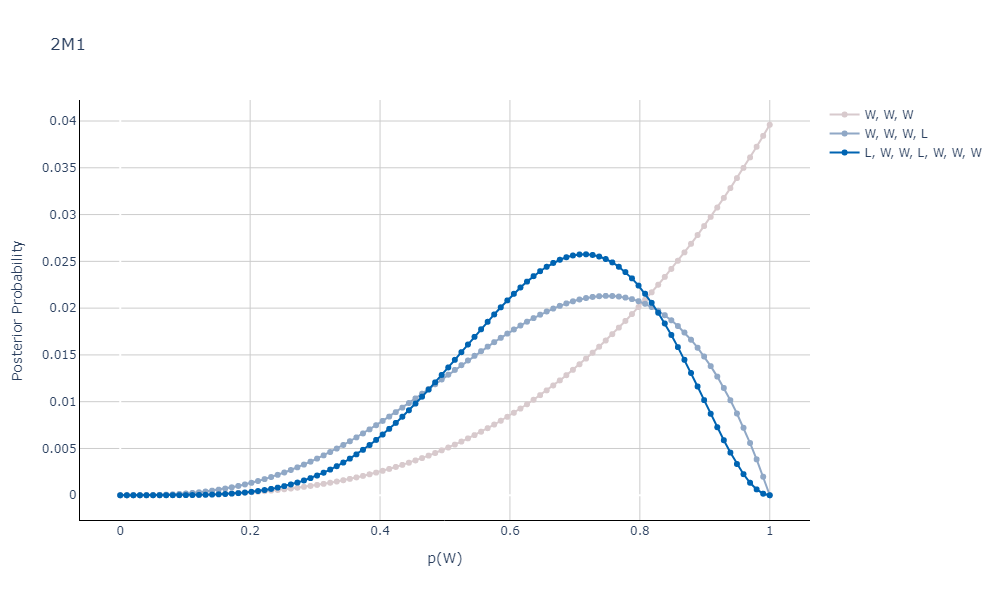

In [35]:
def binomial_posterior_grid(prior_func, grid_points:int, success:int, tosses:int):
    p_grid = np.linspace(0, 1, grid_points)
    prior = prior_func(grid_points)
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    posterior = (likelihood*prior)/np.sum((likelihood*prior))
    return p_grid, posterior

def uniform_prior(grid_points:int):
    return np.repeat((1/grid_points), grid_points)

fig = go.Figure()

grid, posterior = binomial_posterior_grid(uniform_prior, 100, 3, 3)
fig.add_trace(trace=go.Scatter(
    x=grid, y=posterior,
    marker=dict(color='#D8CACD'),
    mode='lines+markers',
    name='W, W, W'
))

grid, posterior = binomial_posterior_grid(uniform_prior, 100, 3, 4)
fig.add_trace(trace=go.Scatter(
    x=grid, y=posterior,
    marker=dict(color='#90a8c6'),
    mode='lines+markers',
    name='W, W, W, L'
))

grid, posterior = binomial_posterior_grid(uniform_prior, 100, 5, 7)
fig.add_trace(trace=go.Scatter(
    x=grid, y=posterior,
    marker=dict(color='#0064b2'),
    mode='lines+markers',
    name='L, W, W, L, W, W, W'
))
General.main_layout(fig, title='2M1', x='p(W)', y='Posterior Probability', width=1000, height=600)

### **2M2**
Now assume a **prior for p that is equal to zero when p < 0.5 and is a positive constant when p ≥ 0.5**. Again compute and plot the grid approximate posterior distribution for each of the sets of observations in the problem just above.

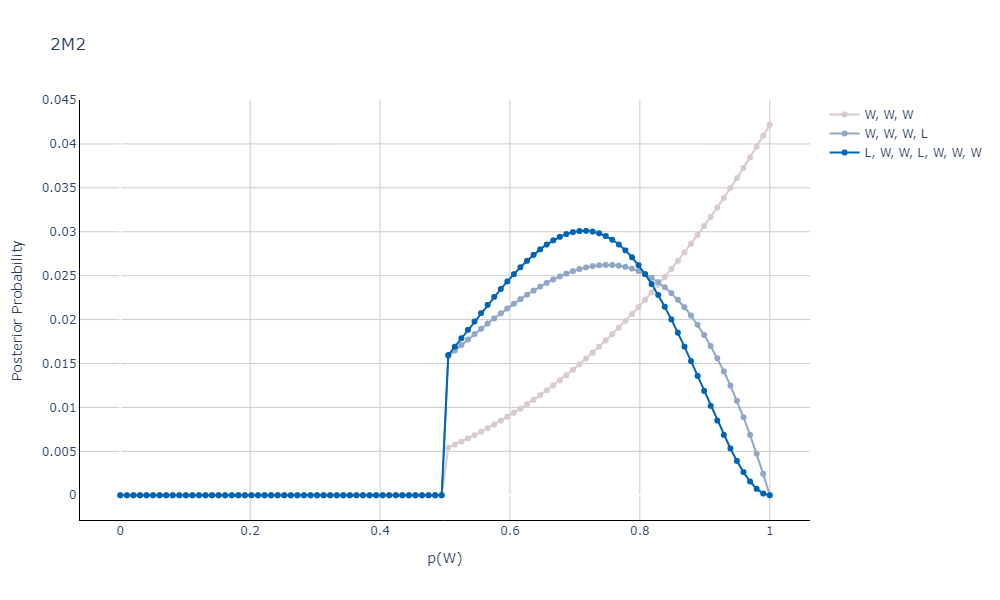

In [33]:
def binomial_posterior_grid(prior_func, grid_points:int, success:int, tosses:int):
    p_grid = np.linspace(0, 1, grid_points)
    prior = prior_func(grid_points)
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    posterior = (likelihood*prior)/np.sum((likelihood*prior))
    return p_grid, posterior

def truncated_prior(grid_points:int, trunc:float=0.5):
    return (np.linspace(0, 1, grid_points) >= trunc).astype(int)

fig = go.Figure()

grid, posterior = binomial_posterior_grid(truncated_prior, 100, 3, 3)
fig.add_trace(trace=go.Scatter(
    x=grid, y=posterior,
    marker=dict(color='#D8CACD'),
    mode='lines+markers',
    name='W, W, W'
))

grid, posterior = binomial_posterior_grid(truncated_prior, 100, 3, 4)
fig.add_trace(trace=go.Scatter(
    x=grid, y=posterior,
    marker=dict(color='#90a8c6'),
    mode='lines+markers',
    name='W, W, W, L'
))

grid, posterior = binomial_posterior_grid(truncated_prior, 100, 5, 7)
fig.add_trace(trace=go.Scatter(
    x=grid, y=posterior,
    marker=dict(color='#0064b2'),
    mode='lines+markers',
    name='L, W, W, L, W, W, W'
))
General.main_layout(fig, title='2M2', x='p(W)', y='Posterior Probability', width=1000, height=600)

### **2M3**
Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered in water. The Mars globe is 100% land. Further suppose that one of these globes—you don’t know which—was tossed in the air and produced a “land” observation. Assume that each globe was equally likely to be tossed. **What is the posterior probability that the globe was the Earth, conditional on seeing “land”**

- $\text{Pr}(\text{L|Earth})=1-0.7=0.3$
- $\text{Pr}(\text{L|Mars})=1$
- $\text{Pr}(\text{Earth})=\text{Pr}(\text{Mars})=0.5$
- $\text{Pr}(\text{L})=\text{Pr}(\text{L|Earth}) \cdot \text{Pr}(\text{Earth})+\text{Pr}(\text{L|Mars}) \cdot \text{Pr}(\text{Mars})=0.65$
$$\text{Pr}(\text{Earth|L})=\dfrac{\text{Pr}(\text{L|Earth}) \cdot \text{Pr}(\text{Earth})}{\text{Pr}(\text{L})} \approx 23.07\%$$

### **2H1**
Suppose there are two species of **panda bear**. Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research.<br>
Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. **What is the probability that her next birth will also be twins?**

- $\text{Pr}(\text{Panda}_\text{A})=\text{Pr}(\text{Panda}_\text{B})=0.5$
- $\text{Pr}(\text{twin|Panda}_\text{A})=0.1$
- $\text{Pr}(\text{twin|Panda}_\text{B})=0.2$
$$\text{Pr}(\text{twin}_\text{1})=\text{Pr}(\text{twin|Panda}_\text{A}) \cdot \text{Pr}(\text{Panda}_\text{A})+ \text{Pr}(\text{twin|Panda}_\text{B}) \cdot \text{Pr}(\text{Panda}_\text{B}) \approx 0.15$$

- $\text{Pr}(\text{A|twin}_\text{1})=\dfrac{\text{Pr}(\text{twin}_\text{1}\text{|A}) \cdot \text{Pr}(\text{A})}{\text{Pr}(\text{twin}_\text{1})}=\dfrac{0.1 \cdot 0.5}{0.15}=\dfrac{1}{3}$
- $\text{Pr}(\text{B|twin}_\text{1})=\dfrac{\text{Pr}(\text{twin}_\text{1}\text{|B}) \cdot \text{Pr}(\text{B})}{\text{Pr}(\text{twin}_\text{1})}=\dfrac{0.2 \cdot 0.5}{0.15}=\dfrac{2}{3}$

$$\text{Pr}(\text{twin}_\text{2}|\text{twin}_\text{1})=\text{Pr}(\text{twin|Panda}_\text{A}) \cdot \text{Pr}(\text{A}|\text{twin}_\text{1}) + \text{Pr}(\text{twin|Panda}_\text{B}) \cdot \text{Pr}(\text{B}|\text{twin}_\text{1})=0.1 \cdot \dfrac{1}{3} + 0.2 \cdot \dfrac{2}{3} \approx 16.77\%$$